# Vecchia normalizzazione (back from 2009)

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%store -r grafici_da_plottare
stock = grafici_da_plottare[0]

In [3]:
# matplotlib non prende le date come stringa né come pandas datetime, 
# serve prima portarlo a datetime e poi riconvertirlo in object
def toplot_dateindex(stock):
    return pd.to_datetime(stock.index).astype('O')

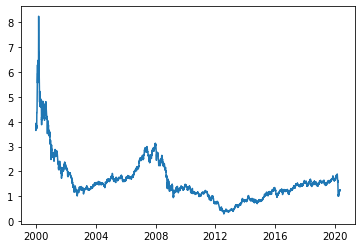

In [4]:
plt.plot(toplot_dateindex(stock), stock.values)

In [5]:
def g(x):
    return 0.06736903303094223 + 0.0021432382123922505 * x

def normvol2bis(n, serie):
    Nn = len(serie)
    vol = []
    #vol = Table[{0, 0}, {Nn - n}];
    SigmaN = g(n)
    for j in range(1, Nn-n):
        window = serie[j:j + n]
        mu = np.mean(window)
        SigmaL = np.std(window)
        window = (window - mu)/(SigmaL/SigmaN)
        vol.append( [(i + j - 1, window[i]) for i in range(len(window))] )
    
    return vol

def normedie(delta_t, serie):
    norm = normvol2bis(delta_t, serie)
    durata = len(serie)
    numeri = []
    Dt = delta_t+1
    for h in range(1,durata):
        k=h
        if ( k < durata - Dt + 1 ):
            if (k >= Dt):
                numeri_k = [ norm[i][k-i+1][1] for i in range(k-Dt+1, k)]
            else:
                numeri_k = [ norm[i][k-i+1][1] for i in range(k) ]
        else:
            numeri_k = [ norm[i][k-i+1][1] for i in range(k-Dt+1, durata-Dt+1) ]
            
        numeri.append(numeri_k)
    
    medieint = [np.mean(k) for k in numeri]
    return medieint


def normvol3(delta_t, serie_values, serie_timeindex):
    
    serie_timeindex = pd.to_datetime(serie_timeindex)
    durata = len(serie_values)
    window = serie_values[0:delta_t]
    normalizzato_index = serie_timeindex[0:delta_t]   
    #print(type(normalizzato_index))
    window = (window - window.mean())/(window.std())
    normalizzato = window    
    
    for j in range(1, durata - delta_t):
        window = serie_values[j:j+delta_t]        
        window = (window - window.mean())/(window.std())
        window_index = serie_timeindex[j:j+delta_t]  
        
        normalizzato = np.append(normalizzato, window[-1])
        #print('da appendere' + str(type(to_append)))
        normalizzato_index = normalizzato_index.append(window_index[[-1]])
        #print(type(normalizzato_index))
        
    return normalizzato, normalizzato_index

In [6]:
norm5, norm_index = normvol3(3, stock.values, stock.index)

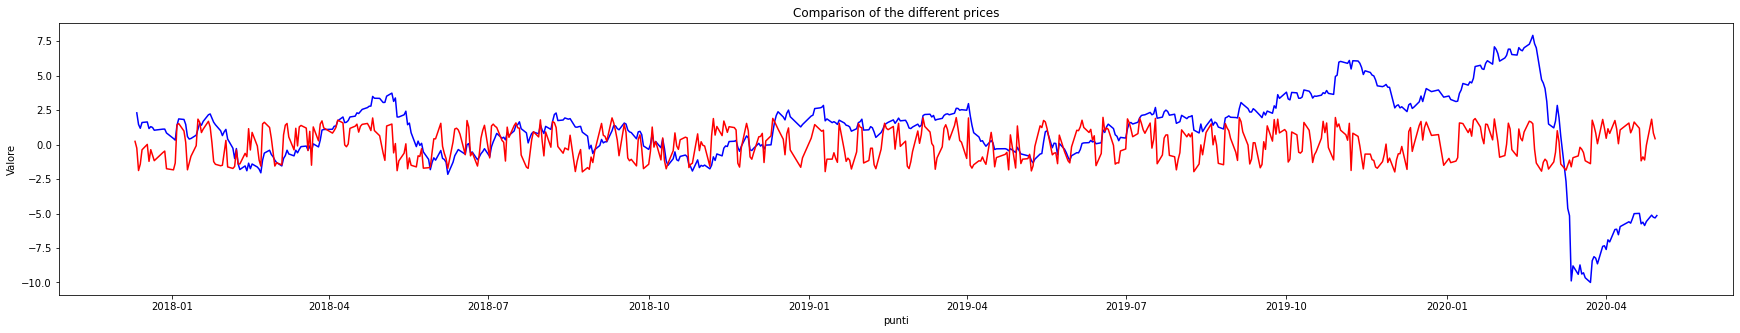

In [8]:
def plot_originale_normalizzata(originale, norm, norm_index, interv = -600, a=1, b=0):
    
    fig, ax = plt.subplots(figsize=(30,5))
    ax.plot(toplot_dateindex(originale)[-interv:], originale.values[-interv:]*a+b, label='Originale', color='blue')
    ax.plot(norm_index[-interv:].astype('O'), norm[-interv:], label='Normalizzata', color = 'red')
    #legend = ax.legend(loc='center right', fontsize='x-large')
    plt.xlabel('punti')
    plt.ylabel('Valore')
    plt.title('Comparison of the different prices')
    plt.show()
    
plot_originale_normalizzata(stock, norm5, norm_index, interv = 600, a=20, b=-30)

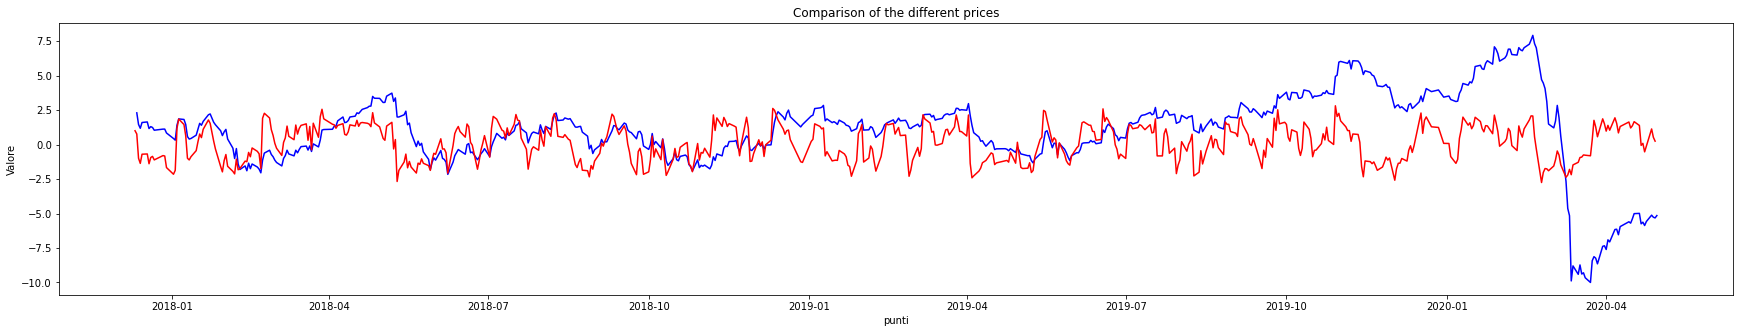

In [94]:
deltaT = [5,10,20,50]

res = [normvol3(dt, stock.values, stock.index) for dt in deltaT]

In [97]:
somma = np.zeros(len(res[0][0]))
for r in res:
     somma = somma + r[0]

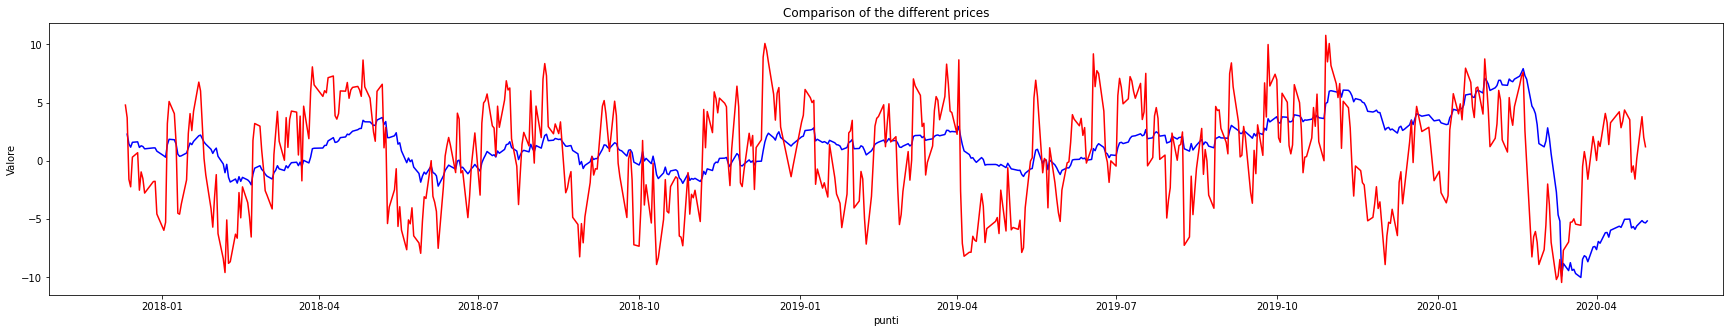

In [99]:
plot_originale_normalizzata(stock, somma, res[0][1], interv = 600, a=20, b=-30)

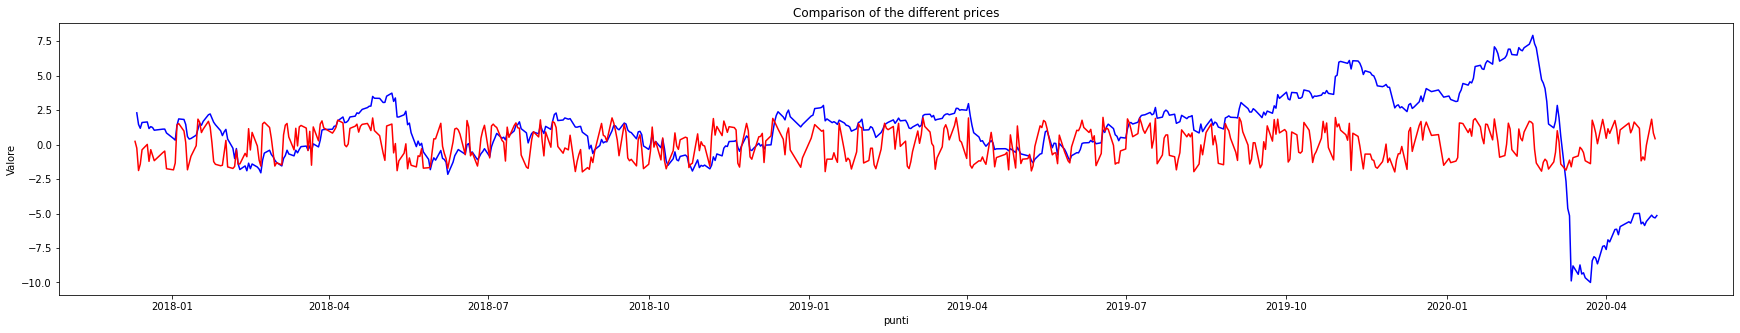

In [100]:
norm, norm_index = normvol3(5, stock.values, stock.index)
plot_originale_normalizzata(stock, norm, norm_index, interv = 600, a=20, b=-30)

In [101]:
%store norm 
%store norm_index

Stored 'norm' (ndarray)
Stored 'norm_index' (DatetimeIndex)
